In [1]:
import cv2
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
import time
import threading
#from Data_File import Data
import Data_File
import cost_functions
from autograd.misc.optimizers import rmsprop
plt.close('all')

In [2]:

train_prop = .5
test_prop = .3
v_prop = .2

Data_File.data_writer('Dataset',train_prop,test_prop,v_prop)



train_x,train_y = Data_File.Data('faces')
test_x,test_y = Data_File.Data('test')
(h,w) = train_y[0].shape

In [22]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def mse(img1,img2):
    return np.mean(np.square(img1 - img2))

def pred(img):
    x1 = np.matmul(A,img)
    x2 = np.matmul(x1,B)
    return x2


def cost2(A,B,X,y):
    
    total_error = 0
    ans = []
    for i in range(len(X)):
        ans.append(0)
        
    index=0
    objs=[]
    for i in range(len(X)):
        thd_obj = threading.Thread(target=pred_and_cost, args=(A,B,X[i],y[i],ans,index,))
        thd_obj.start()
        objs.append(thd_obj)
        index+=1
        
    for i in objs:
        i.join()            
    return (np.sum(np.array(ans))/len(ans))

def pred_and_cost(A,B,img,y,results,index):
    x1 = np.matmul(A,img)
    x2 = np.matmul(x1,B)
    val = mse(x2,y)
    
    results[index] = val
    
    
    
    
def avg_psnr(A,B,X,y):
    s = 0
    for i in range(len(X)):
        s = s + psnr(y[i],np.matmul(np.matmul(A,X[i]),B))
    return s/len(X)

In [4]:
train_x[0]

array([[ 0.03529412,  0.01568627,  0.01176471, ...,  0.42745098,
         0.42745098,  0.41176471],
       [ 0.05098039,  0.01960784,  0.01176471, ...,  0.43529412,
         0.41568627,  0.41176471],
       [ 0.04705882,  0.01960784,  0.01568627, ...,  0.15686275,
         0.03921569,  0.11764706],
       ..., 
       [ 0.42745098,  0.40392157,  0.2627451 , ...,  0.55294118,
         0.4745098 ,  0.4745098 ],
       [ 0.49411765,  0.03529412,  0.21568627, ...,  0.4       ,
         0.40784314,  0.40392157],
       [ 0.10588235,  0.03529412,  0.2       , ...,  0.39607843,
         0.40392157,  0.4       ]])

In [5]:
A = np.random.random((h,h//2))/10
B = np.random.random((w//2,w))/10

In [6]:
lr = alpha =  .01
iterations = 4000
error = []
x_axis = []

In [7]:
trainer = grad(cost2,argnum=[0,1])
start = time.time()
for i in range(0,iterations):
    if i%100==0:
        curr_error = cost2(A,B,train_x,train_y)
        print ("Cost at "+str(i)+" : " + str(curr_error) + " PSNR is ",psnr(pred(train_x[0])*255,train_y[0]*255)," LR : "+str(alpha)+" Time Elaspsed is ",time.time() - start)
        
        x_axis.append(i+1)
        error.append(curr_error)
    grad_A,grad_B = trainer(A,B,train_x,train_y)
    A -=alpha*grad_A
    B -=alpha*grad_B
    alpha = lr/(((grad_A**2).sum() + (grad_B**2).sum() + 1e-8)**(.5))
    

        


('Cost at 0 : 4.35468548379 PSNR is ', -3.931261302223496, ' LR : 0.01 Time Elaspsed is ', 0.4626731872558594)
('Cost at 100 : 0.995157072567 PSNR is ', 2.4433085901476606, ' LR : 0.00528854445076 Time Elaspsed is ', 14.019772052764893)
('Cost at 200 : 0.0629445169806 PSNR is ', 13.110785865171806, ' LR : 0.0489057537504 Time Elaspsed is ', 27.835455179214478)
('Cost at 300 : 0.0391029718292 PSNR is ', 14.839021975975793, ' LR : 1.37560384115 Time Elaspsed is ', 43.70743203163147)
('Cost at 400 : 0.0324433757835 PSNR is ', 15.587202200794417, ' LR : 1.52602335244 Time Elaspsed is ', 58.779919147491455)
('Cost at 500 : 0.0259256009682 PSNR is ', 16.57272487761649, ' LR : 1.56613005953 Time Elaspsed is ', 73.39368605613708)
('Cost at 600 : 0.0200040952424 PSNR is ', 17.777155631249844, ' LR : 1.87698874068 Time Elaspsed is ', 88.36356210708618)
('Cost at 700 : 0.0156337820609 PSNR is ', 18.93037137371769, ' LR : 2.89324153945 Time Elaspsed is ', 108.78090906143188)
('Cost at 800 : 0.0128

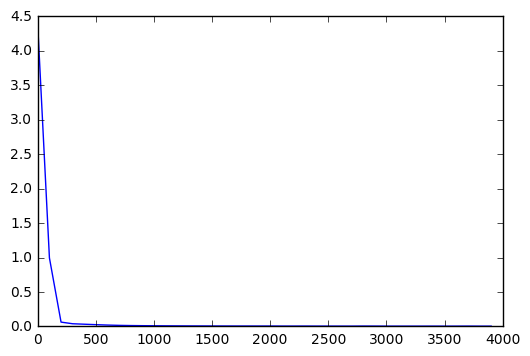

In [8]:
fig = plt.figure()
A_copy = np.copy(A)
B_copy = np.copy(B)

plt.plot(x_axis,error)
plt.show()

# Checking its Perfomance on Train Data

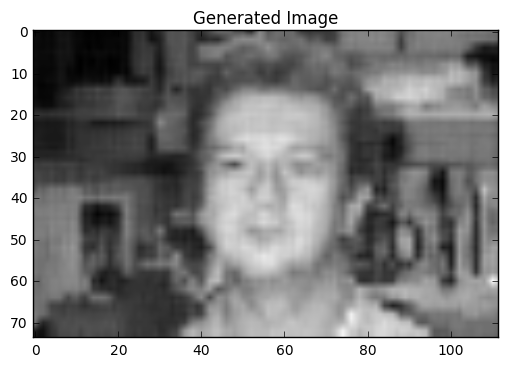

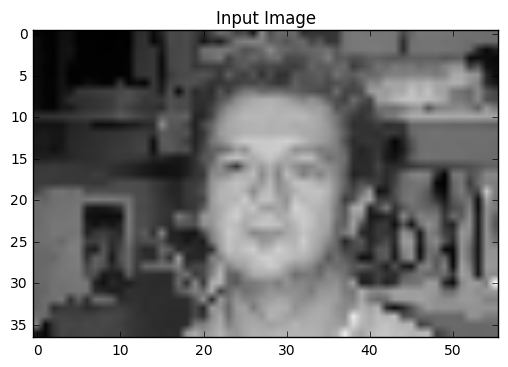

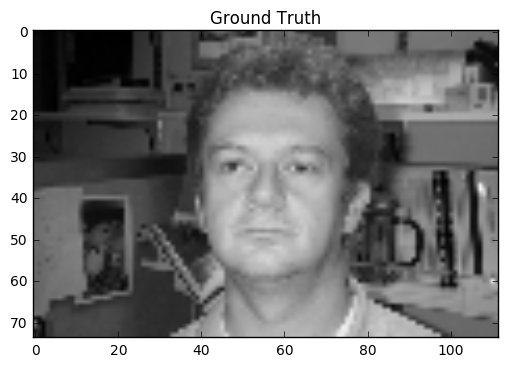

('Training Error is ', 0.0046642396059277417)
('AVG training psnr is ', 23.716252961323914)


In [24]:
plt.close('all')
img_id = 0
gen_img = pred(train_x[img_id])
fig = plt.figure()
plt.imshow(gen_img,cmap='gray')
plt.title('Generated Image')

fig = plt.figure()
plt.imshow(train_x[img_id],cmap = 'gray')
plt.title('Input Image')

fig = plt.figure()
plt.imshow(train_y[img_id],cmap = 'gray')
plt.title('Ground Truth')




plt.show()

print ("Training Error is ",np.mean(np.square(train_y - np.matmul(A,np.matmul(train_x,B)))))
print ("AVG training psnr is ",avg_psnr(A,B,train_x*255,train_y*255))


# Checking its Perfomance on Test Data

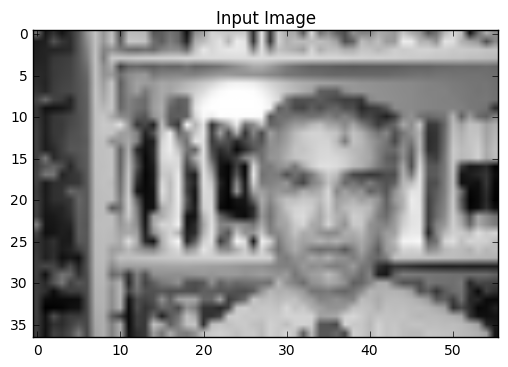

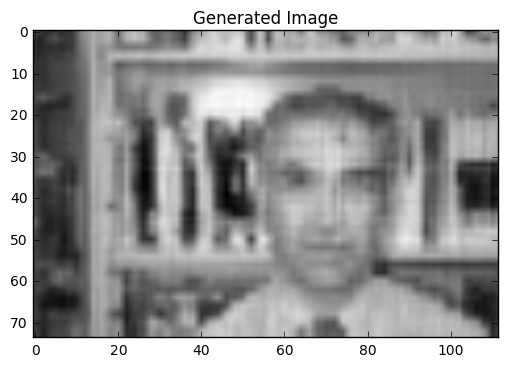

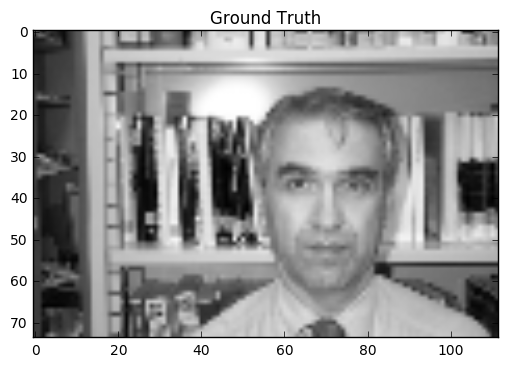

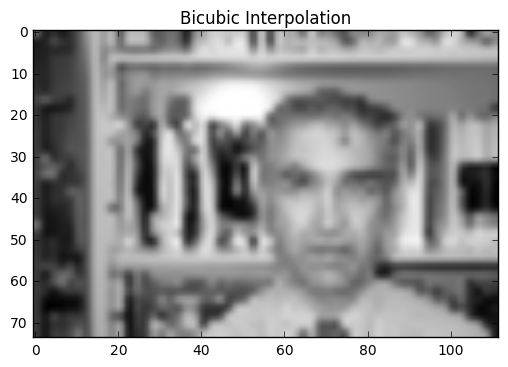

('Testing Error is ', 0.0053622029594153639)
('AVG Testing psnr is ', 23.17970146010149)


In [25]:
plt.close('all')
img_id = 0
gen_img = pred(test_x[img_id])
fig = plt.figure()
plt.imshow(test_x[img_id],cmap = 'gray')
plt.title('Input Image')

fig = plt.figure()

plt.imshow(gen_img,cmap='gray')
plt.title('Generated Image')


fig = plt.figure()
plt.imshow(test_y[img_id],cmap = 'gray')
plt.title('Ground Truth')

fig = plt.figure()
plt.imshow(cv2.resize(test_x[img_id],(0,0),fx=2,fy=2),cmap='gray')
plt.title("Bicubic Interpolation")
plt.show()

print ("Testing Error is ",np.mean(np.square(test_y - np.matmul(A,np.matmul(test_x,B)))))
print ("AVG Testing psnr is ",avg_psnr(A,B,test_x*255,test_y*255))


In [15]:

s = 0
for i in range(len())


0.00466423960593
0.00466423960593


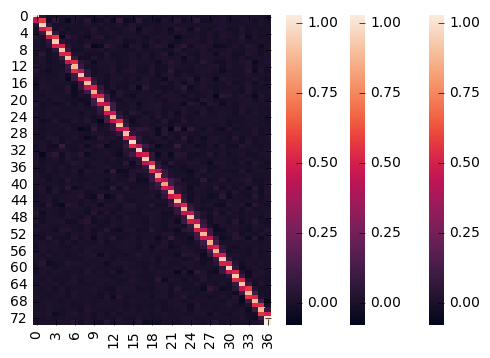

In [19]:

import seaborn as sns
sns.heatmap(A)
plt.show()

array([  1.00526145e+00,   4.26673580e-02,  -1.38814611e-02,
        -2.90225721e-04,   1.28722125e-03,   3.68567267e-03,
         9.75924474e-03,   5.86656609e-03,  -1.78534500e-02,
        -8.77604180e-03,   1.45295607e-02,  -8.52876332e-03,
         2.82768147e-03,  -4.48657407e-03,  -1.55599901e-03,
        -5.06123826e-04,  -1.62084325e-03,   8.02522146e-03,
        -1.00890595e-02,   1.92104064e-03,  -6.08870393e-03,
         4.82986363e-03,  -9.38311636e-04,  -3.65085917e-03,
         1.44940415e-02,  -5.69549073e-03,  -9.67157814e-03,
         1.79848772e-03,  -3.75460949e-03,   1.09746385e-02,
        -7.25129815e-03,   6.40936179e-03,  -7.60040551e-03,
         6.24077196e-03,   4.86777154e-03,  -5.59056514e-03,
        -3.88404602e-03])

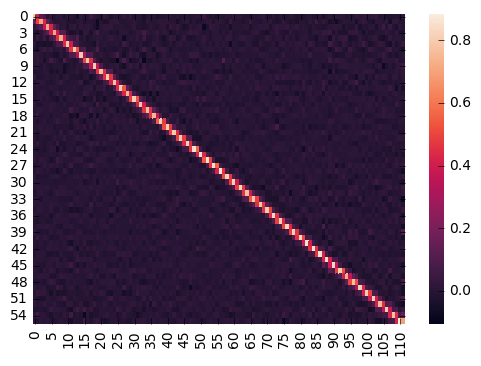

In [21]:

import seaborn as sns
sns.heatmap(B)
plt.show()